# Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt

# Importação das Tabelas 

In [2]:
teste = pd.read_csv('data/england-premier-league-matches-2018-to-2019-stats.csv')

In [3]:
teste

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.00,0.00,1.89,1.32,2,1,3,1,1,0,"3,83",90'2,2,5,2,0,1,0,0,2,0,1,8,8,7,5,1,3,11,8,46,54,1.25,1.46,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.00,0.00,1.32,1.74,1,2,3,3,1,2,11,"8,18",3,5,2,0,2,0,0,2,1,1,11,13,3,6,8,7,11,12,40,60,1.18,1.58,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.00,0.00,1.53,0.74,2,0,2,1,1,0,"24,90'1",NaN,7,4,1,0,1,0,1,0,1,0,11,7,5,2,6,5,11,9,62,38,1.50,0.89,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.00,0.00,1.11,1.53,0,2,2,1,0,1,NaN,"41,79",5,5,1,0,2,0,1,0,1,1,11,11,7,11,4,0,9,11,66,34,1.67,1.81,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.00,0.00,0.47,1.58,0,3,3,2,0,2,NaN,"34,45,80",2,5,2,0,1,0,1,1,0,1,6,8,2,5,4,3,9,8,37,63,0.90,1.17,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...
5,1533996000,Aug 11 2018 - 2:00pm,complete,20051,Watford,Brighton & Hove Albion,Jonathan Moss,1,0.00,0.00,1.42,0.68,2,0,2,1,1,0,"35,54",NaN,8,2,2,0,2,0,0,2,1,1,15,6,6,0,9,6,10,16,53,47,1.78,0.65,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,2.26,3.35,3.45,1.44,2.35,4.55,9.50,2.00,1.71,Vicarage Road (Watford)
6,1534005000,Aug 11 2018 - 4:30pm,complete,31231,Wolverhampton Wanderers,Everton,Craig Pawson,1,0.00,0.00,1.79,1.05,2,2,4,2,1,1,"44,80","17,67",3,6,0,0,1,1,0,0,2,0,10,9,5,6,5,3,8,7,57,43,1.41,1.34,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,2.57,3.39,2.89,1.39,2.20,4.10,9.00,1.91,1.77,Molineux Stadium (Wolverhampton- West Midlands)
7,1534077000,Aug 12 2018 - 12:30pm,complete,53235,Liverpool,West Ham United,Anthony Taylor,1,0.00,0.00,2.79,1.11,4,0,4,2,2,0,"19,45'2,53,88",NaN,5,4,1,0,2,0,1,0,0,2,16,5,9,3,7,2,14,9,64,36,2.12,0.75,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,1.33,5.56,9.99,1.11,1.40,2.00,3.50,1.83,1.87,Anfield (Liverpool)
8,1534077000,Aug 12 2018 - 12:30pm,complete,30784,Southampton,Burnley,Graham Scott,1,0.00,0.00,1.21,0.89,0,0,0,0,0,0,NaN,NaN,8,5,0,0,1,0,0,0,1,0,10,13,4,7,6,6,10,9,47,53,1.29,1.69,0.00,0,0,0,0,0,0,0,

# Funções 

In [4]:
def dados_previos_away(x, df, coluna):
    '''
    função que calcula a média dos dados prévios do time visitante
    '''
    semana = x['Game Week']
    
    nome_away = x['away_team_name']
    
    selecao = df.groupby(['away_team_name',(df['Game Week'] < semana) & (df['Game Week'] > semana - 6)])[coluna].mean().reset_index()
    
    selecao2 = selecao.loc[(selecao['Game Week'] == True) & (selecao['away_team_name'] == nome_away),coluna]
    
    if len(selecao2) > 0:
        return selecao2.iloc[0].to_list()
    else:
        return 0
    
def dados_previos_home(x, df, coluna):
    '''
    Função que calcula a média dos dados prévios do time mandante 
    '''
    semana = x['Game Week']
    
    nome_home = x['home_team_name']
    
    selecao = df.groupby(['home_team_name',(df['Game Week'] < semana) & (df['Game Week'] > semana - 6)])[coluna].mean().reset_index()
    
    selecao2 = selecao.loc[(selecao['Game Week'] == True) & (selecao['home_team_name'] == nome_home),coluna]
    
    if len(selecao2) > 0:
        return selecao2.iloc[0].to_list()
    else:
        return 0

def resultados_recentes_home(x, df):
    '''
    função que calcula as derrotas, empates e vitórias recentes do time mandante
    '''
    semana = x['Game Week']
    
    time_home = x['home_team_name']
    
    tabela_home = df.groupby(['home_team_name','Game Week']).sum().reset_index()[['home_team_name','Game Week','resultado']]
    
    tabela_home_time = tabela_home[(tabela_home['Game Week'] < semana) & (tabela_home['Game Week'] >= semana - 6) & (tabela_home['home_team_name'] == time_home)]
    
    derrotas = tabela_home_time.loc[tabela_home_time['resultado'] == 0,'resultado'].count()
    
    empates = tabela_home_time.loc[tabela_home_time['resultado'] == 1,'resultado'].count()
    
    vitorias = tabela_home_time.loc[tabela_home_time['resultado'] == 3,'resultado'].count()
    
    return derrotas,empates,vitorias

def resultados_recentes_away(x, df):
    '''
    função que calcula as derrotas, empates e vitórias recentes do time visitante
    '''
    semana = x['Game Week']
    
    time_home = x['away_team_name']
    
    tabela_home = df.groupby(['away_team_name','Game Week']).sum().reset_index()[['away_team_name','Game Week','resultado']]
    
    tabela_home_time = tabela_home[(tabela_home['Game Week'] < semana) & (tabela_home['Game Week'] >= semana - 6) & (tabela_home['away_team_name'] == time_home)]
    
    derrotas = tabela_home_time.loc[tabela_home_time['resultado'] == 0,'resultado'].count()
    
    empates = tabela_home_time.loc[tabela_home_time['resultado'] == 1,'resultado'].count()
    
    vitorias = tabela_home_time.loc[tabela_home_time['resultado'] == 3,'resultado'].count()
    
    return derrotas,empates,vitorias


# Seleção de Colunas Relevantes

In [5]:
teste.columns

Index(['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name',
       'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)',
       'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count',
       'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time',
       'home_team_goal_count_half_time', 'away_team_goal_count_half_time',
       'home_team_goal_timings', 'away_team_goal_timings',
       'home_team_corner_count', 'away_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards',
       'away_team_yellow_cards', 'away_team_red_cards',
       'home_team_first_half_cards', 'home_team_second_half_cards',
       'away_team_first_half_cards', 'away_team_second_half_cards',
       'home_team_shots', 'away_team_shots', 'home_team_shots_on_target',
       'away_team_shots_on_target', 'home_team_shots_off_target',
       'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls',
       'home_team_possession', 'away_te

In [6]:
teste_filtrado = teste[['date_GMT', 'home_team_name','away_team_name','Game Week','Pre-Match PPG (Home)'
                        ,'Pre-Match PPG (Away)','home_team_goal_count','away_team_goal_count','home_team_corner_count'
                        , 'away_team_corner_count','home_team_yellow_cards','home_team_red_cards','away_team_yellow_cards'
                        , 'away_team_red_cards','home_team_shots', 'away_team_shots', 'home_team_shots_on_target'
                        ,'away_team_shots_on_target', 'home_team_shots_off_target','away_team_shots_off_target'
                        ,'home_team_fouls', 'away_team_fouls','home_team_possession', 'away_team_possession']]

# Transformação dos Dados 

In [7]:
#adição da coluna resultado
teste_filtrado['resultado'] = 1

teste_filtrado.loc[teste_filtrado['home_team_goal_count'] < teste_filtrado['away_team_goal_count'],'resultado'] = 0

In [8]:
#transformação para datetime 
teste_filtrado['date_GMT'] = pd.to_datetime(teste_filtrado['date_GMT'])

In [9]:
#colunas referentes à estatisticas da partida do time vizitante
colunas_away = ['away_team_goal_count','away_team_corner_count','away_team_yellow_cards'
                                               ,'away_team_red_cards','away_team_shots','away_team_shots_on_target'
                                               ,'away_team_shots_off_target','away_team_fouls','away_team_possession']

In [10]:
#colunas referentes à estatisticas da partida do time mandante
colunas_home = ['home_team_goal_count','home_team_corner_count','home_team_yellow_cards'
                                               ,'home_team_red_cards','home_team_shots','home_team_shots_on_target'
                                               ,'home_team_shots_off_target','home_team_fouls','home_team_possession']

In [11]:
# transformação dos dados da partida em dados médio de partidas anteriores sobre o time vizitante 
away_mean = teste_filtrado.apply(dados_previos_away,axis = 1,df=teste_filtrado,coluna=colunas_away).apply(pd.Series)

away_mean.columns = colunas_away

teste_filtrado[colunas_away] = away_mean

In [12]:
# transformação dos dados da partida em dados médio de partidas anteriores sobre o time mandante 
home_mean = teste_filtrado.apply(dados_previos_home,axis = 1,df=teste_filtrado,coluna=colunas_home).apply(pd.Series)

home_mean.columns = colunas_away

teste_filtrado[colunas_home] = home_mean

In [13]:
#Adição das colunas 'derrotas_home','empates_home' e'vitorias_home' do time da casa
home_resultados_recentes = teste_filtrado.apply(resultados_recentes_home,axis = 1,df=teste_filtrado).apply(pd.Series)

home_resultados_recentes.columns = ['derrotas_home','empates_home','vitorias_home']

df_resultados_recentes = pd.concat([teste_filtrado,home_resultados_recentes], axis = 1,)

In [14]:
#Adição das colunas 'derrotas_away','empates_away' e'vitorias_away' do time visitante 
away_resultados_recentes = teste_filtrado.apply(resultados_recentes_away,axis = 1,df=teste_filtrado).apply(pd.Series)

away_resultados_recentes.columns = ['derrotas_away','empates_away','vitorias_away']

df_resultados_recentes_completo = pd.concat([df_resultados_recentes,away_resultados_recentes], axis = 1,)

In [15]:
teste_filtrado = df_resultados_recentes_completo

In [16]:
#limpeza dos nulos
teste_filtrado.dropna(inplace=True)

In [17]:
# transformação das colunas para o tipo correto 
teste_filtrado[['derrotas_home','empates_home','vitorias_home','derrotas_away','empates_away','vitorias_away']] = teste_filtrado[['derrotas_home','empates_home','vitorias_home','derrotas_away','empates_away','vitorias_away']].astype('int32')

# Modelagem

In [18]:
#Seleção de colunas para a modelagem
teste_modelagem = teste_filtrado[['Pre-Match PPG (Home)','Pre-Match PPG (Away)','home_team_goal_count','away_team_goal_count','resultado']]

In [19]:
# setup da pipiline 
classification = setup(data = teste_modelagem, target='resultado',session_id=42)

,Description,Value
0,session_id,42
1,Target,resultado
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(360, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
# comparação dos modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7332,0.7603,0.8276,0.7866,0.8049,0.3810,0.3854,0.0030
lr,Logistic Regression,0.7329,0.7708,0.8989,0.7526,0.8180,0.3254,0.3500,0.3500
ridge,Ridge Classifier,0.7329,0.0000,0.8989,0.7526,0.8180,0.3254,0.3500,0.0040
lda,Linear Discriminant Analysis,0.7329,0.7716,0.8989,0.7526,0.8180,0.3254,0.3500,0.0110
ada,Ada Boost Classifier,0.7171,0.7045,0.8585,0.7577,0.7988,0.3177,0.3437,0.0200
qda,Quadratic Discriminant Analysis,0.7138,0.7495,0.8401,0.7580,0.7924,0.3185,0.3365,0.0040
knn,K Neighbors Classifier,0.7131,0.6969,0.8037,0.7789,0.7882,0.3384,0.3465,0.0060
lightgbm,Light Gradient Boosting Machine,0.6775,0.6657,0.7625,0.7643,0.7563,0.2688,0.2784,0.0090
gbc,Gradient Boosting Classifier,0.6697,0.6415,0.7978,0.7306,0.7599,0.2216,0.2317,0.0160
dummy,Dummy Classifier,0.6694,0.5000,1.0000,0.6694,0.8018,0.0000,0.0000,0.0030


In [21]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [22]:
# seleção do modelo knn para a tunagem
model = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7308,0.7288,0.8235,0.7778,0.8000,0.3893,0.3908
1,0.7200,0.7904,0.8824,0.7500,0.8108,0.2857,0.3001
2,0.8000,0.7132,0.9412,0.8000,0.8649,0.4898,0.5145
3,0.6800,0.7206,0.7647,0.7647,0.7647,0.2647,0.2647
4,0.7200,0.6250,0.8824,0.7500,0.8108,0.2857,0.3001
5,0.6000,0.5919,0.6471,0.7333,0.6875,0.1379,0.1400
6,0.6400,0.5221,0.7059,0.7500,0.7273,0.1993,0.2001
7,0.8000,0.8676,0.7647,0.9286,0.8387,0.5819,0.6012
8,0.6800,0.5972,0.8125,0.7222,0.7647,0.2701,0.2747


In [23]:
# tunagem do modelo knn
tuned_model = tune_model(model, n_iter= 500, choose_better=True, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6154,0.6078,0.7647,0.6842,0.7222,0.1034,0.1052
1,0.8000,0.8713,0.9412,0.8000,0.8649,0.4898,0.5145
2,0.7600,0.8566,0.9412,0.7619,0.8421,0.3644,0.4023
3,0.6800,0.8493,0.9412,0.6957,0.8000,0.0826,0.1138
4,0.7600,0.6985,0.9412,0.7619,0.8421,0.3644,0.4023
5,0.7200,0.7353,0.8235,0.7778,0.8000,0.3346,0.3361
6,0.6800,0.6066,0.8235,0.7368,0.7778,0.2126,0.2168
7,0.8400,0.9081,1.0000,0.8095,0.8947,0.5763,0.6362
8,0.7200,0.7153,0.9375,0.7143,0.8108,0.3083,0.3546


In [24]:
# avaliação do modelo
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [25]:
# finalização do modelo
final_model = finalize_model(tuned_model)

In [26]:
# criaão do arquivo .pkl com o modelo 
save_model(final_model,model_name = 'bot_apostas')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='resultado',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('fix_perfect', Remove_100(target='resultado')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
      

# Avaliação do Modelo

In [27]:
# dataframe de previsão
previsao = predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6789,0.6136,0.8732,0.7045,0.7799,0.2110,0.2284


In [28]:
# adição de uma string para separar os casos de erro
previsao['soma'] = previsao['resultado'].astype('str') + previsao['Label'].astype('str')

In [34]:
previsao.query('Label == 0')

,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,resultado,Label,Score,soma
9,0.67,2.43,0.500000,2.000000,0,0,0.6667,00
15,1.14,2.17,1.000000,2.500000,1,0,0.6970,10
22,1.18,2.24,1.500000,2.500000,0,0,0.6364,00
28,0.00,1.50,1.000000,2.500000,0,0,0.6667,00
32,0.44,1.61,1.000000,0.500000,1,0,0.5152,10
33,0.71,2.00,1.500000,2.000000,1,0,0.6667,10
41,1.50,3.00,2.000000,3.000000,1,0,0.5455,10
48,0.00,1.00,1.000000,2.000000,0,0,0.6061,00
52,1.20,2.50,1.000000,4.500000,0,0,0.5455,00
57,0.67,1.43,0.500000,1.666667,1,0,0.6061,10


In [33]:
classification

,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,resultado
20,1.00,3.00,2.000000,2.000000,1
21,3.00,1.00,2.000000,2.000000,1
22,0.00,0.00,0.000000,0.000000,1
23,0.00,0.00,0.000000,0.000000,1
24,1.00,0.00,0.000000,1.000000,0
...,...,...,...,...,...
375,2.78,1.28,3.500000,1.500000,1
376,2.00,0.61,1.500000,0.000000,0
377,1.22,0.33,2.333333,0.000000,1
378,2.06,1.06,1.666667,0.000000,1


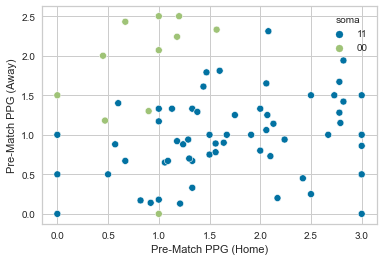

In [30]:
# casos em que houve o acerto 
sns.scatterplot(data = previsao.query('resultado == Label'), x = 'Pre-Match PPG (Home)', y ='Pre-Match PPG (Away)',hue = 'soma')
plt.savefig('previsao_correta.jpg')

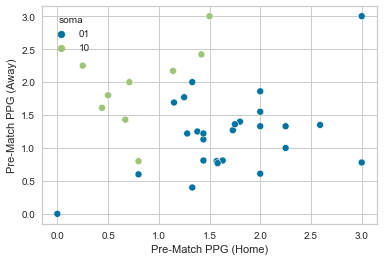

In [31]:
# casos em que houve o erro
sns.scatterplot(data = previsao.query('resultado != Label'), x = 'Pre-Match PPG (Home)', y ='Pre-Match PPG (Away)',hue = 'soma')
plt.savefig('previsao_incorreta.jpg')

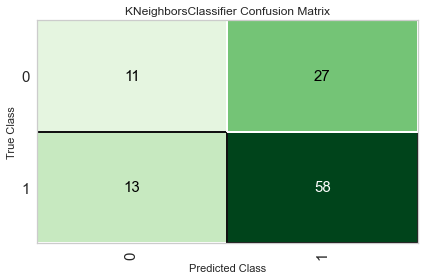

<Figure size 432x288 with 0 Axes>

In [32]:
# matriz de confusão do modelo
plot_model(model,plot = 'confusion_matrix')
plt.savefig('confusion_matrix.jpg') 